# ARU - Hackathon - EDA

## Exploratory Data Analysis

### Import Packages

In [20]:
%%time
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

import plotly.io as pio
pio.renderers.default = "notebook_connected"


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("Done!")

Done!
CPU times: user 360 µs, sys: 6 µs, total: 366 µs
Wall time: 364 µs


### Import Functions

In [21]:
def find_column_row_number(number_of_values):
  col_num = number_of_values
  rows = np.floor(np.sqrt(col_num))
  while(col_num % rows != 0):
       rows = rows - 1
  if col_num/rows > 5:
    cols = 5
    rows = int(np.ceil(col_num/cols))
  else:
    cols = int(rows)
    rows = int(col_num/rows)
  if cols > rows:
    cols, rows = rows, cols
  return cols, rows

def plot_distribution(df, columns, plot):
  
  col_num = len(columns)
  cols, rows = find_column_row_number(col_num)
  
  combinations = list(itertools.product(range(1, rows+1), range(1, cols+1)))[:col_num]
  combinations_dict = {columns[i]: combinations[i] for i in range(col_num)}

  fig = make_subplots(rows=rows, cols=cols, subplot_titles=(columns))
  
  if plot == 'H':

    for c, fig_info  in combinations_dict.items():
      row_num, col_num  = fig_info

      fig.add_trace(go.Histogram(x=df[c], name = c,  opacity=0.7), row= row_num, col= col_num)
  
  if plot == 'B':

    for c, fig_info  in combinations_dict.items():
      row_num, col_num  = fig_info

      fig.add_trace(go.Box(x=df[c], name = c,  opacity=0.7), row= row_num, col= col_num)
      fig.update_yaxes(showticklabels=False)
      
  if plot == 'V':

    for c, fig_info  in combinations_dict.items():
      row_num, col_num  = fig_info

      fig.add_trace(go.Violin(x=df[c], name = c, box_visible=True, meanline_visible=True,  opacity=0.7), row= row_num, col= col_num)
      fig.update_yaxes(showticklabels=False)
      
  fig.update_layout(showlegend = False,
      autosize=False,
      width=1000,
      height=750,
      template = 'plotly_white')

  fig.show(renderer="notebook_connected")

def colinearity(df):

  corr = df.corr()

  mask = np.triu(np.ones_like(corr, dtype=bool))

  f, ax = plt.subplots(figsize=(11, 9))

  sns.heatmap(corr, annot=True,
            annot_kws={"fontsize": 12},
            linewidths=0.5,
            center=0.00,
            fmt=".2f",
            xticklabels= corr.columns,
            yticklabels= corr.columns,
            ax=ax,
            mask=mask,
            cmap = sns.diverging_palette(10, 240, n=9),
            vmin=-1, 
            vmax=1)

### Import and Explore

In [76]:
df = pd.read_csv("corona_tested_individuals_ver_006.english.csv")

In [6]:
print(df.shape)

(278848, 10)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   test_date            278848 non-null  object
 1   cough                278848 non-null  object
 2   fever                278848 non-null  object
 3   sore_throat          278848 non-null  object
 4   shortness_of_breath  278848 non-null  object
 5   head_ache            278848 non-null  object
 6   corona_result        278848 non-null  object
 7   age_60_and_above     278848 non-null  object
 8   gender               278848 non-null  object
 9   test_indication      278848 non-null  object
dtypes: object(10)
memory usage: 21.3+ MB


In [23]:
display(df.describe())

test_date   cough   fever  sore_throat  shortness_of_breath  \
count       278848  278848  278848       278848               278848   
unique          51       5       5            5                    5   
top     2020-04-20       0       0            0                    0   
freq         10921  121649  133942       260664               261079   

        head_ache corona_result age_60_and_above  gender test_indication  
count      278848        278848           278848  278848          278848  
unique          5             3                3       3               3  
top             0      negative             None  female           Other  
freq       260079        260227           127320  130158          242741

In [24]:
df.isna().sum()/len(df)*100

test_date              0.0
cough                  0.0
fever                  0.0
sore_throat            0.0
shortness_of_breath    0.0
head_ache              0.0
corona_result          0.0
age_60_and_above       0.0
gender                 0.0
test_indication        0.0
dtype: float64

In [36]:
for i in df.columns[1:]:
    display(df.value_counts(i))

cough
0    119702
0    113431
1     25545
1     16024
dtype: int64

fever
0    131873
0    121455
1     13374
1      8000
dtype: int64

sore_throat
0    256849
0     15965
1      1456
1       432
dtype: int64

shortness_of_breath
0    257259
0     15897
1      1046
1       500
dtype: int64

head_ache
0    256270
0     16055
1      2035
1       342
dtype: int64

corona_result
negative    260008
positive     14694
dtype: int64

age_60_and_above
NaN    125659
No     123668
Yes     25375
dtype: int64

gender
female    128413
male      127255
NaN        19034
dtype: int64

test_indication
Other                     239167
Abroad                     25068
Contact with confirmed     10467
dtype: int64

## Initial Preprocessing

### All Variables

In [63]:
target_columns = ['corona_result']
datetime_columns = ['test_date']
binary_columns = ['cough', 'fever', 'sore_throat', 'shortness_of_breath','head_ache']
categorical_columns = ['test_indication','age_60_and_above','gender']

In [38]:
df = df.replace('None', None)

In [39]:
df.dropna(inplace=True, subset=binary_columns)

In [40]:
df = df.fillna('NaN')

In [41]:
df = df.loc[(df['corona_result'] == 'positive') | (df['corona_result'] == 'negative')]

### Target Variables

In [42]:
target_df = df[target_columns]

In [43]:
target_df = pd.get_dummies(target_df, drop_first=True)

In [44]:
target_df = target_df.replace({True:1,False:0})

In [45]:
target_df.columns = ['is_corona_positive']

In [46]:
print(target_df.value_counts('is_corona_positive'))

is_corona_positive
0    260008
1     14694
dtype: int64


### Categorical Variables

In [52]:
cat_df = df[categorical_columns]

In [53]:
cat_df = pd.get_dummies(cat_df)

In [54]:
cat_df = cat_df.replace({True:1,False:0})

### Binary Variables

In [65]:
binary_df = df[binary_columns]

### Datetime Variables

In [64]:
datetime_df = df[datetime_columns]

datetime_df['test_date'] = pd.to_datetime(datetime_df['test_date'])

start_date = datetime(2020, 3, 11)

datetime_df['days_since_start'] = (datetime_df['test_date'] - start_date).dt.days

datetime_df = datetime_df[['days_since_start']]

## Making Final Dataframe

### Concatenating and making columns numerical

In [67]:
final_df = pd.concat([target_df, cat_df], axis=1)
final_df = pd.concat([binary_df, final_df], axis=1)
final_df = pd.concat([datetime_df, final_df], axis=1)

In [68]:
final_df = final_df.astype(int)

### Plotting Dataframe

In [73]:
plot_distribution(final_df, final_df.columns, plot='H')

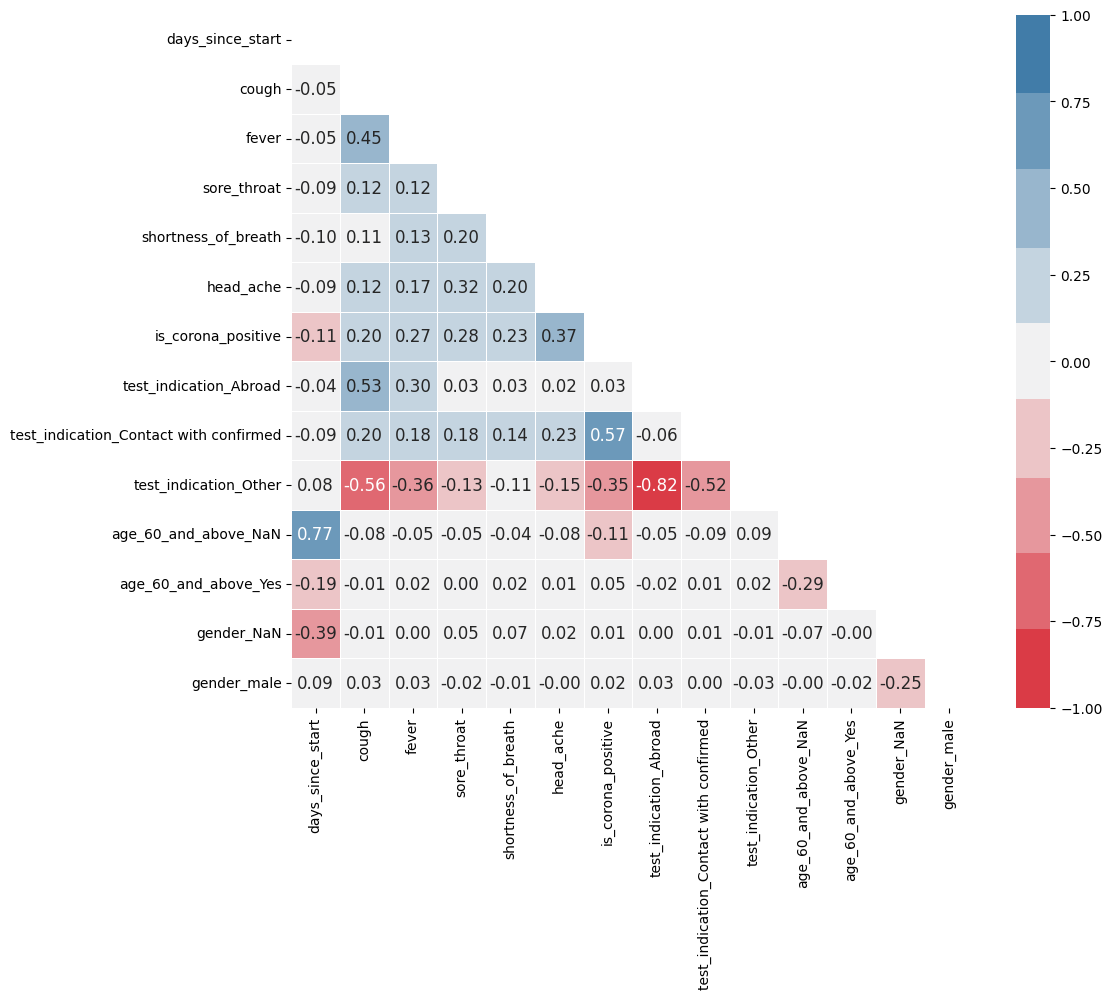

In [74]:
colinearity(final_df)

### Dropping columns

In [72]:
final_df = final_df.drop(columns = ['gender_female', 'age_60_and_above_No'])

### Export final_df as csv

In [494]:
final_df.to_csv('final_df.csv', index=False)